
# 📈 Caso 1: Optimización de valores con Hill Climbing y A*

## 🧩 Contexto del Caso
Una empresa desea ajustar el valor de una variable \(x\) que maximice su rendimiento económico según la siguiente función objetivo:

\[
f(x) = -x^2 + 10x
\]

### Elementos:
- Rango de valores: \(x \in [0, 10]\)
- Estado inicial: \(x = 0\)
- Objetivo: encontrar el \(x\) que maximiza la función
- Algoritmos: **Hill Climbing** y **A\***
    

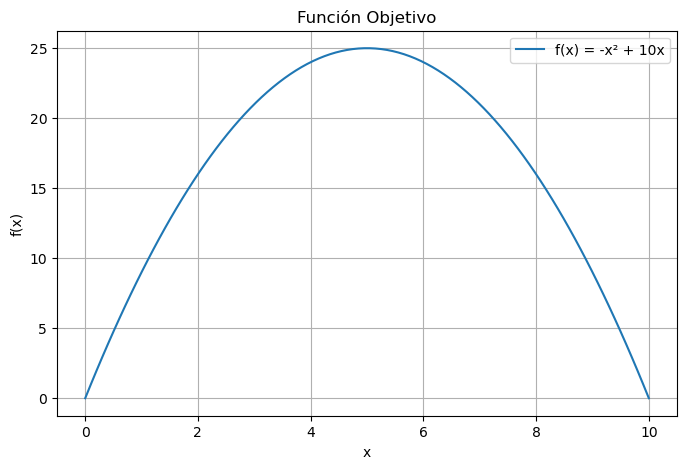

In [1]:

import matplotlib.pyplot as plt
import numpy as np

# Función objetivo
def f(x):
    return -x**2 + 10*x

x_vals = np.linspace(0, 10, 100)
y_vals = f(x_vals)

plt.figure(figsize=(8,5))
plt.plot(x_vals, y_vals, label='f(x) = -x² + 10x')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Función Objetivo')
plt.grid(True)
plt.legend()
plt.show()
    

In [2]:

# Algoritmo Hill Climbing
def hill_climbing():
    x = 0
    path = [x]
    while True:
        neighbors = [x - 1, x + 1]
        neighbors = [n for n in neighbors if 0 <= n <= 10]
        best = max(neighbors, key=f)
        if f(best) > f(x):
            x = best
            path.append(x)
        else:
            break
    return path

path_hill = hill_climbing()
print("Camino (Hill Climbing):", path_hill)
    

Camino (Hill Climbing): [0, 1, 2, 3, 4, 5]


In [3]:

# Algoritmo A*
from heapq import heappush, heappop

def heuristic(x):
    return -abs(5 - x)  # heurística centrada en el máximo esperado

def a_star():
    open_list = []
    heappush(open_list, (-f(0) + heuristic(0), 0))
    visited = set()
    came_from = {}
    while open_list:
        _, current = heappop(open_list)
        if current in visited:
            continue
        visited.add(current)
        if current == 5:
            break
        for neighbor in [current - 1, current + 1]:
            if 0 <= neighbor <= 10 and neighbor not in visited:
                heappush(open_list, (-(f(neighbor) + heuristic(neighbor)), neighbor))
                came_from[neighbor] = current

    path = [5]
    while path[-1] in came_from:
        path.append(came_from[path[-1]])
    return list(reversed(path))

path_astar = a_star()
print("Camino (A*):", path_astar)
    

Camino (A*): [0, 1, 2, 3, 4, 5]


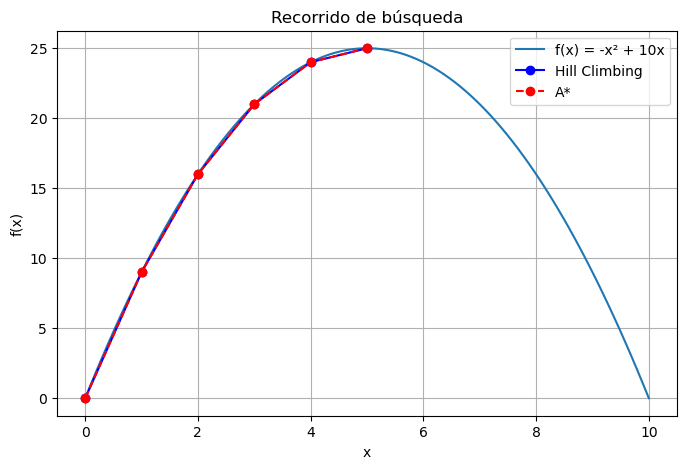

In [4]:

# Visualización de ambos recorridos
plt.figure(figsize=(8,5))
plt.plot(x_vals, y_vals, label='f(x) = -x² + 10x')
plt.plot(path_hill, [f(x) for x in path_hill], 'bo-', label='Hill Climbing')
plt.plot(path_astar, [f(x) for x in path_astar], 'ro--', label='A*')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Recorrido de búsqueda')
plt.grid(True)
plt.legend()
plt.show()
    


## ✅ Conclusión del Caso 1
- **Hill Climbing** sigue una subida directa hasta llegar al pico local/global.
- **A\*** utiliza una heurística para prever el mejor camino al objetivo esperado.
- En este caso, ambos llegan al mismo máximo global en \(x=5\), aunque A* puede ser más robusto si el espacio fuera más complejo.
    